In [1]:
import pandas as pd
from textblob import TextBlob

In [2]:
df = pd.read_csv('CTV/result.csv')

In [3]:
January = df.loc[df['publishtime'].str.contains('Jan')]
Fabruary = df.loc[df['publishtime'].str.contains('Feb')]
Match =  df.loc[df['publishtime'].str.contains('Mar')]
April =  df.loc[df['publishtime'].str.contains('Apr')]
May =  df.loc[df['publishtime'].str.contains('May')]
June =  df.loc[df['publishtime'].str.contains('Jun')]
July =  df.loc[df['publishtime'].str.contains('Jul')]
Augest =  df.loc[df['publishtime'].str.contains('Aug')]
September =  df.loc[df['publishtime'].str.contains('Sep')]
Octorber =  df.loc[df['publishtime'].str.contains('Oct')]
Novermber =  df.loc[df['publishtime'].str.contains('Nov')]
December1 =  df.loc[df['publishtime'].str.contains('Dec') ]
December2 =  df.loc[df['publishtime'].str.contains('ago') ]
December = pd.concat([December1 , December2])

In [4]:
December2

,Unnamed: 0,title,description,publishtime,url,content


In [5]:
dfList = [January , (Fabruary) , (Match) , (April) , (May) , (June) , (July) , (Augest) , (September) , (Octorber) , (Novermber) , December]
MonthList = ["January" ," Fabruary" , "Match", "April" , "May" , "June" , "July" , "Augest" , "September" , "Octorber" , "Novermber" , "December"]
len(dfList)

12

In [6]:
def getNum(objlist):
    numList = []
    for i in objlist:
#         print(len(i))
        numList.append(len(i))
    return numList
getNum(dfList)

[283, 718, 552, 322, 365, 431, 437, 373, 378, 348, 314, 187]

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
def getThemes(objList , n_topics   , n_top_words ):
    num = 0
    for i in objList:
        n_features = 1000
        tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                max_features=n_features,
                                stop_words='english',
                                max_df = 0.5,
                                min_df = 10)
        tf = tf_vectorizer.fit_transform(i.content.values.astype('U'))

        
        lda = LatentDirichletAllocation(n_topics, max_iter=50,
                                        learning_method='online',
                                        learning_offset=50.,
                                        random_state=0)
        lda.fit(tf)

        def print_top_words(model, feature_names, n_top_words):
            for topic_idx, topic in enumerate(model.components_):
                print("Topic #%d:" % topic_idx)
                print(" ".join([feature_names[i]
                                for i in topic.argsort()[:-n_top_words - 1:-1]]))
            print()

        
        tf_feature_names = tf_vectorizer.get_feature_names()
        print(MonthList[num] + "   :   ")
        print_top_words(lda, tf_feature_names, n_top_words)
        print( "--------------------")
        num += 1

In [8]:
getThemes(dfList , 10 , 10)

January   :   
Topic #0:
canada canadian year world time britain 2020 just cent years
Topic #1:
officials cases canada confirmed public toronto wuhan case canadians canadian
Topic #2:
claims misinformation products hand prevention information fact false agency media
Topic #3:
edmonton alberta association plan protect area line develop significant like
Topic #4:
outbreak leave wuhan symptoms world chinese covering countries days company
Topic #5:
new wuhan chinese outbreak year cases city spread government travel
Topic #6:
wuhan says chinese toronto new canada outbreak cases travel country
Topic #7:
flights travel air canada airline airlines trip shanghai cancel beijing
Topic #8:
montreal quebec jobs friday company family city say near announced
Topic #9:
trump president security american white donald thursday national officials public

--------------------
 Fabruary   :   
Topic #0:
company employee employees work trip workers home office sick concerns
Topic #1:
cent billion year compa

In [9]:
df = pd.read_csv('CTV/result.csv')
lam = [df]
getThemes(lam , 30 , 10)

January   :   
Topic #0:
iran trump united trade president nuclear washington states pompeo administration
Topic #1:
covid 19 canada pandemic says cent care health data study
Topic #2:
year economy billion economic market industry global sales trade business
Topic #3:
world countries global pandemic united european nations states international france
Topic #4:
minister australia prime australian government foreign ministry zhao pandemic country
Topic #5:
eu africa leaders trump climate forces cent week states debate
Topic #6:
hong kong law beijing national taiwan security government chinese democracy
Topic #7:
cent company year million billion quarter april market oil markets
Topic #8:
vaccine chinese vaccines news use countries national eu end leaders
Topic #9:
korea south north city wuhan korean kim seoul chinese province
Topic #10:
kovrig vaccine spavor michael chinese canadian year world says pandemic
Topic #11:
cases province 19 covid announced deaths reported recoveries health of

17340738


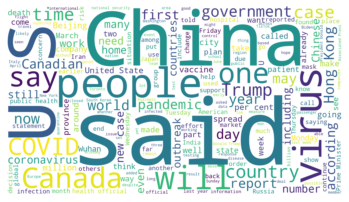

In [10]:
from wordcloud import WordCloud , STOPWORDS
import matplotlib.pyplot as plt

text = ""
stop_words = list(STOPWORDS)
for index , row in df.iterrows():
    text += str(row['content'])
print(len(text))    
wordcloud = WordCloud(
    width = 1920,
    height = 1080,
    stopwords = stop_words,
    background_color = "white",
    
).generate(text)
    

plt.imshow(wordcloud , interpolation = "bilinear")
plt.axis("off")
wordcloud.to_file("contentWordCloud.png")